In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT import *

%load_ext autoreload
%autoreload 2

In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

In [3]:
def contour_data(data, ax, levels, fmt, color='white', linestyle=None):
    CS = ax.contour(data, levels=levels, colors=color, linewidths=1.5, linestyles=linestyle)
    handles, labels = CS.legend_elements()
    return handles
#     ax.clabel(CS, fmt=fmt, inline=1, fontsize=9)

In [21]:
def all_contour_plot(plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group, title="", xlabel="", ylabel="", 
                     clearcolor=False, legend=False, fig=None, ax=None):
    filter_index = np.where(plot_zs<=0.0055)[0]
    plot_rhos = plot_rhos[filter_index]
    plot_zs = plot_zs[filter_index]
    sub_ami = sub_ami[filter_index]
    full_ami = full_ami[filter_index]
    snr_nm = snr_nm[filter_index]
    snr_m = snr_m[filter_index]
#     betterfull = 1*((sub_ami <= 1e-3) & (full_ami >= 1e-3))
#     bettersub = 1*((sub_ami >= 1e-3) & (full_ami <= 1e-3))
    
    
    cmap = cm.coolwarm if clearcolor is False else mpl.colormaps['bwr'].resampled(2)
    plot_snrnm = color_imshow_2d(plot_rhos, plot_zs, snr_nm, z_center=1, title="SNR for full graph", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
    
    cmap = mpl.colormaps["plasma"] if clearcolor is False else mpl.colormaps['plasma'].resampled(2)
    zcenter = 0.5 if clearcolor is False else 1e-3
    plot_fullami = color_imshow_2d(plot_rhos, plot_zs, full_ami, z_center=zcenter, title="AMI for full graph", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
    
    
    cmap = cm.coolwarm if clearcolor is False else mpl.colormaps['bwr'].resampled(2)
    plot_snrm = color_imshow_2d(plot_rhos, plot_zs, snr_m, z_center=1, title="SNR for sub graph", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
    
    save_path = None
    if fig is None and ax is None:
        fig = plt.figure(figsize=(4, 4))
        widths = [6]
        heights = [6]
        spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
        row = 0
        col = 0
        ax = fig.add_subplot(spec5[row, col])
    else:
        fig = fig
        ax = ax
    cmap = mpl.colormaps["plasma"] if clearcolor is False else mpl.colormaps['plasma'].resampled(2)
    zcenter = 0.5 if clearcolor is False else 1e-3
    plot_subami = color_imshow_2d(plot_rhos, plot_zs, sub_ami, z_center=zcenter, title="AMI for sub graph", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
    
    print(ax)
    handels = []
    handels += contour_data(plot_fullami, ax, levels=[1e-3], fmt={1e-3: r'$AMI_{full}\simeq$0'}, color='#ffaa00')
    handels += contour_data(plot_snrnm, ax, levels=[1], fmt={1: r'$SNR_{full}=1$'}, color='#ffaa00', linestyle='dashed')
    handels += contour_data(plot_subami, ax, levels=[1e-3], fmt={1e-3: r'$AMI_{sub}\simeq$0'}, color='#009ade')
    handels += contour_data(plot_snrm, ax, levels=[1], fmt={1: r'$SNR_{sub}=1$'}, color='#009ade', linestyle='dashed')
    cmap = LinearSegmentedColormap.from_list('mylist', ['#ffffff', '#00b000'], N=2)
#     betterfull = color_imshow_2d(plot_rhos, plot_zs, betterfull, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
#     bettersub = color_imshow_2d(plot_rhos, plot_zs, bettersub, z_center=zcenter, title="", xlabel=r'$\rho$', ylabel=r'$\delta$', cmap=cmap, return_gridz=True)
#     ax.contourf(betterfull, 1, hatches=['', '//'], alpha=0)
#     ax.contourf(bettersub, 1, hatches=['', '\\'], alpha=0)
#     ax.imshow(betterfull)
#     ax.imshow(bettersub)
    contour_fullami = contourpy.contour_generator(z=plot_fullami).lines(1e-3)
    contour_subami = contourpy.contour_generator(z=plot_subami).lines(1e-3)
#     print(contour_fullami, contour_subami)
    i = 0
    for line_fullami, line_subami in zip(contour_fullami, contour_subami):
        # Construct a polygon from the two contour lines
#         print(np.abs(line_subami[:, 1]), np.abs(np.average(line_fullami[:, 1])))
        if i == 1:
            betterfull_subindex = np.where(np.average(line_fullami[:, 1])<=line_subami[:, 1])[0]
#             bettersub_subindex = np.where(np.average(line_fullami[:, 1])>=line_subami[:, 1])[0]
        else:
            betterfull_subindex = np.where(np.average(line_fullami[:, 1])>=line_subami[:, 1])[0]
#             bettersub_subindex = np.where(np.average(line_fullami[:, 1])<=line_subami[:, 1])[0]
        min_rho, max_rho = np.min(line_subami[betterfull_subindex, :][:, 0]), np.max(line_subami[betterfull_subindex, :][:, 0]) # min and max rho for subami in this part
        betterfull_fullindex = np.where((min_rho<=line_fullami[:, 0]) & (line_fullami[:, 0]<=max_rho))[0]
        better_full_polygon = np.concatenate([line_fullami[betterfull_fullindex, :], line_subami[betterfull_subindex, :][::-1]], axis=0)
#         print(better_full_polygon[:, 0], better_full_polygon[:, 1])
        ax.fill(better_full_polygon[:, 0], better_full_polygon[:, 1], fc="red", alpha=0.5, ec=None)
#         print(min_rho, max_rho)
        bettersub_fullindex = np.where(min_rho>line_fullami[:, 0])[0]
        bettersub_subindex = np.where(min_rho>line_subami[:, 0])[0]
        
        better_sub_polygon = np.concatenate([line_fullami[bettersub_fullindex, :], line_subami[bettersub_subindex, :][::-1]], axis=0)
#         print(better_sub_polygon[:, 0], '\n', better_sub_polygon[:, 1])
        ax.fill(better_sub_polygon[:, 0], better_sub_polygon[:, 1], fc="skyblue", alpha=0.5, ec=None)
        
        bettersub_fullindex = np.where((max_rho<line_fullami[:, 0]))[0]
        bettersub_subindex = np.where((max_rho<line_subami[:, 0]))[0]
        better_sub_polygon = np.concatenate([line_fullami[bettersub_fullindex, :], line_subami[bettersub_subindex, :][::-1]], axis=0)
        ax.fill(better_sub_polygon[:, 0], better_sub_polygon[:, 1], fc="skyblue", alpha=0.5, ec=None)
        i += 1
    
    
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, rotation='horizontal', fontsize=13)
    # ax.set_xlim(np.min(x), np.max(x))
    # ax.set_ylim(np.min(y), np.max(y))
    # print(f'{np.min(y)}, {np.max(y)}')
    x, y = plot_rhos, plot_zs
    ax.set_xticks(np.linspace(0, np.size(np.sort(np.unique(x)))-1, 3), np.around(np.linspace(np.min(x), np.max(x), 3), 3), fontsize=10)
    yticks_num = int(np.size(np.unique(y)) / 3)
    ax.set_yticks(np.linspace(0, np.size(np.sort(np.unique(y))) - 1, yticks_num), np.around(np.linspace(np.min(y), np.max(y), yticks_num), 3), fontsize=10)
    if legend:
        plt.legend(handels, [r'$AMI_{full}\simeq$0', r'$SNR_{full}=1$', r'$AMI_{sub}\simeq$0', r'$SNR_{sub}=1$'], loc='center')

Axes(0.125,0.11;0.227941x0.77)
Axes(0.398529,0.11;0.227941x0.77)
10000


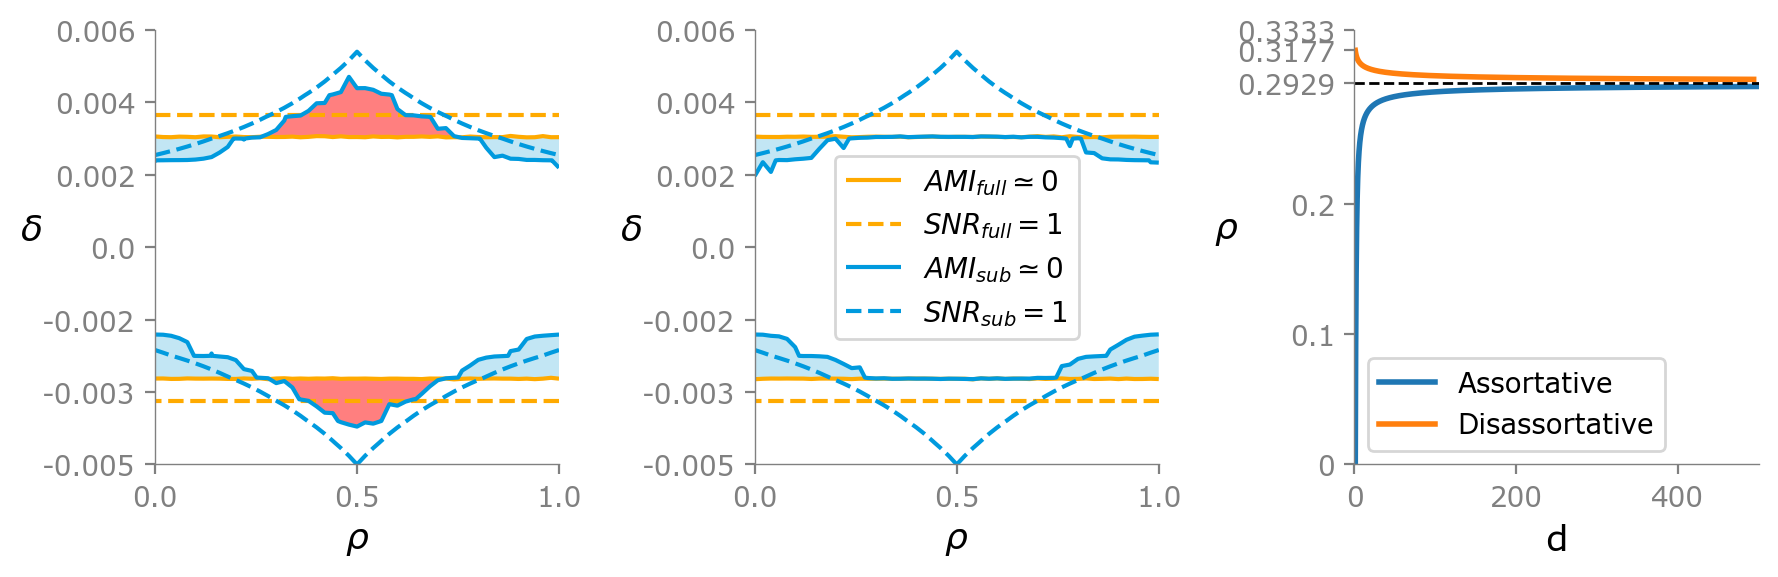

In [22]:
fig = plt.figure(figsize=(9, 3))
widths = [3, 3, 3]
heights = [3]
spec5 = fig.add_gridspec(ncols=3, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# For big n
X = 2
Z = 3
n = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = False
DC = False
HelpWithFull = False
LabelPropagate = False
fileId = 'amiExp5.17' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
addfileId = 'amiExp8.8' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' + \
                 f'{"givenNumGroup" if givenNumGroup else ""}_' + \
                 f'{"DC" if DC else ""}_{"HelpWithFull" if HelpWithFull else ""}_' + \
                 f'{"LabelPropagate" if LabelPropagate else ""}' + '_add'
addload_path = "./result/detectabilityWithMeta/" + addfileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=addload_path)
# print(ax)
all_contour_plot(plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group, 
                 title="", xlabel=r'$\rho$', ylabel=r'$\delta$', clearcolor=False, legend=False, fig=fig, ax=ax)

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
# For big n
X = 2
Z = 3
n = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = False
DC = False
HelpWithFull = True
LabelPropagate = False
fileId = 'amiExp6.12' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' \
                            f'{"givenNumGroup" if givenNumGroup else ""}_' \
                            f'{"DC" if DC else ""}_{"HelpWithFull" if HelpWithFull else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
addfileId = 'amiExp8.8' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_' + \
                 f'{"givenNumGroup" if givenNumGroup else ""}_' + \
                 f'{"DC" if DC else ""}_{"HelpWithFull" if HelpWithFull else ""}_' + \
                 f'{"LabelPropagate" if LabelPropagate else ""}' + '_add'
addload_path = "./result/detectabilityWithMeta/" + addfileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group = read_exp(load_path=load_path, Withsnr=Withsnr, givenNumGroup=givenNumGroup, old=False, add_path=addload_path)
all_contour_plot(plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group, 
                 title="", xlabel=r'$\rho$', ylabel=r'$\delta$', clearcolor=False, legend=True, fig=fig, ax=ax)

col = 2
ax = fig.add_subplot(spec5[row, col])
rhos = np.setdiff1d(np.around(np.linspace(0, 1/3, 10000), 6), np.array([0.5]))
ds = np.zeros(np.shape(rhos))
for i in range(np.size(rhos)):
    rho = rhos[i]
    ds[i] = ((3*rho - 1)/((rho - 1)*(2*rho**2-4*rho+1)))**2#  (((1-2*rho)**2+2*((1-rho)**2)-1) / (4*((1-rho)**4)-2*((1-rho)**2)))**2
print(np.size(rhos))
choose_index = np.where((ds>1)&(ds<500))[0]
rhos = rhos[choose_index]
ds = ds[choose_index]
assort_index = np.where(rhos<(2-np.sqrt(2))/2)[0]
disassort_index = np.where(rhos>=(2-np.sqrt(2))/2)[0]
ax.plot(ds[assort_index], rhos[assort_index], linewidth=2, label="Assortative")
ax.plot(ds[disassort_index], rhos[disassort_index], linewidth=2, label="Disassortative")
ax.set_xlabel(r'd', fontsize=13)
ax.set_ylabel(r'$\rho$', rotation='horizontal', fontsize=13)
ax.set_xlim(0, 500)
ax.set_ylim(0, 1/3)
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks([0, 0.1, 0.2, 0.3333]+[0.2929, 0.3177])
plt.axhline((2-np.sqrt(2))/2, color='k', lw=1, linestyle='--')
plt.legend()

plt.subplots_adjust(wspace=0.5)

save_path = "./_Figure/" + "figure3.pdf"
plt.tight_layout()
plt.savefig(save_path, dpi=600)